In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from config import db_key

from sqlalchemy import create_engine

In [2]:
# connect to database
user = "Housing_Database"
password = db_key
host = "housing-database.c6zoxppofyzr.us-east-1.rds.amazonaws.com"
port = '5432'
database = "postgres"

con_string = f'postgresql://{user}:{password}@{host}:{port}/{database}'

engine = create_engine(con_string)

In [3]:
# load training and testing data
train_df = pd.read_sql("SELECT * FROM boston_housing_training", engine)
test_df = pd.read_sql("SELECT * FROM boston_housing_testing", engine)

train_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  4.75237   0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666.0   
1  0.22188  20.0   6.96     1  0.464  7.691  51.8  4.3665    3  223.0   
2  0.04590  52.5   5.32     0  0.405  6.315  45.6  7.3172    6  293.0   
3  0.29090   0.0  21.89     0  0.624  6.174  93.6  1.6119    4  437.0   
4  3.69695   0.0  18.10     0  0.718  4.963  91.4  1.7523   24  666.0   

   PTRATIO       B  LSTAT  MEDV   ID  
0     20.2   50.92  18.13  14.1  455  
1     18.6  390.77   6.58  35.2  273  
2     16.6  396.90   7.60  22.3  288  
3     21.2  388.08  24.16  14.0  140  
4     20.2  316.03  14.00  21.9  366

In [4]:
test_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  1.05393   0.0   8.14     0  0.538  5.935  29.3  4.4986    4  307.0   
1  0.01381  80.0   0.46     0  0.422  7.875  32.0  5.6484    4  255.0   
2  0.14030  22.0   5.86     0  0.431  6.487  13.0  7.3967    7  330.0   
3  0.15936   0.0   6.91     0  0.448  6.211   6.5  5.7209    3  233.0   
4  7.02259   0.0  18.10     0  0.718  6.006  95.3  1.8746   24  666.0   

   PTRATIO       B  LSTAT  MEDV   ID  
0     21.0  386.85   6.58  23.1   16  
1     14.4  394.23   2.97  50.0  195  
2     19.1  396.28   5.90  24.4  250  
3     17.9  394.46   7.44  24.7   43  
4     20.2  319.98  15.70  14.2  421

In [5]:
# seperate features and target values
X_train=train_df.drop(["ID", "MEDV"], axis=1)
y_train=train_df["MEDV"]
X_test=test_df.drop(["ID", "MEDV"], axis=1)
y_test=test_df["MEDV"]

In [8]:
# instate model and fit to training data, make predictions
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [9]:
# evaluate model with testing data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"The RMSE of this model is: {rmse}")

The RMSE of this model is: 2.9213341600217184


LSTAT      0.409262
RM         0.398412
DIS        0.048672
CRIM       0.039876
NOX        0.023577
TAX        0.020019
AGE        0.018786
PTRATIO    0.012514
INDUS      0.011419
B          0.011349
RAD        0.002834
ZN         0.002207
CHAS       0.001073
dtype: float64


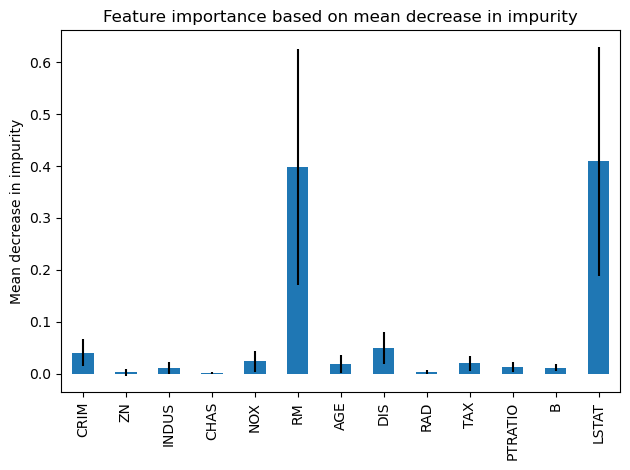

In [12]:
# calculate impurity based feature importances, get mean and std
# get importrances from model
feature_names = [f"{i}" for i in X_train.columns]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

rf_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance based on mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print(rf_importances.sort_values(ascending=False))